In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import torch
import math
import networkx as nx
from tqdm import tqdm 
from PIL import Image
from crp.image import imgify, vis_opaque_img, plot_grid
from collections import Counter

from tigramite import plotting as tp

%matplotlib inline

In [2]:
from cmiknnmixed import CMIknnMixed
from crp_attribution import CRPAttribution
from network import train_network, performance_analysis, accuracy_per_class
from causal_discovery import CausalDiscovery
from plotting import plot_multipartite, draw_graph
from biased_dsprites_dataset import get_dataset, get_biased_loader
from crp_hierarchies import sample_from_categories, average_hierarchies
%reload_ext autoreload
%autoreload 2

{0: Counter({False: 208969, True: 36791}), 1: Counter({True: 208775, False: 36985})}
491520


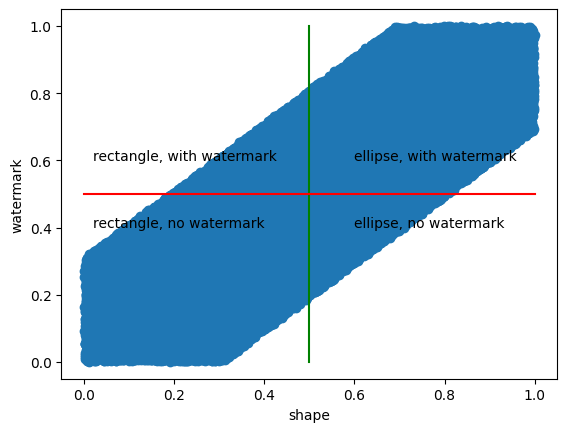

In [114]:
BATCH_SIZE = 128
BIAS = 0.69
STRENGTH = 0.5
NAME = "exp"
ITEMS_PER_CLASS = 245760

train_ds, train_loader, test_ds, test_loader = get_dataset(BIAS, STRENGTH)

print(len(train_ds))

In [84]:
model = train_network(train_loader, BIAS, STRENGTH, NAME, BATCH_SIZE, load=False, retrain=False)

cpu
exp_59_5.pickle
EPOCH 1:


  batch 1100 correct 95.35% loss 0.14: : 1152it [01:19, 14.52it/s]


loss epoch: 0.13695714581757784
EPOCH 2:


  batch 1100 correct 99.76% loss 0.01: : 1152it [01:07, 16.99it/s]


loss epoch: 0.008355976125167218
EPOCH 3:


  batch 1100 correct 99.91% loss 0.0: : 1152it [01:10, 16.41it/s]

loss epoch: 0.0031995201992685907


In [85]:
crp_attribution = CRPAttribution(model, test_ds, NAME, STRENGTH, BIAS)

In [28]:
crp_attribution.compute_feature_vis()

computing feature vis
Running Analysis...


  0%|          | 0/15360 [00:00<?, ?it/s]

100%|██████████| 15360/15360 [14:06<00:00, 18.15it/s]


100%|██████████| 160/160 [00:00<00:00, 1306.03it/s]


Layer: convolutional_layers.0


 17%|█▋        | 1/6 [00:00<00:01,  4.69it/s]/home/lilli/miniconda3/envs/mt/lib/python3.10/site-packages/zennit/image.py:187: RuntimeWarning: invalid value encountered in divide
  array = (array - vmin) / (vmax - vmin)
100%|██████████| 6/6 [00:00<00:00,  9.26it/s]


Layer: convolutional_layers.3


100%|██████████| 6/6 [00:00<00:00,  9.16it/s]


Layer: convolutional_layers.6


100%|██████████| 6/6 [00:00<00:00, 10.55it/s]


Layer: linear_layers.0


100%|██████████| 6/6 [00:00<00:00,  7.69it/s]


Layer: linear_layers.2


100%|██████████| 2/2 [00:00<00:00,  8.73it/s]


{'r_max': ['crp-data/exp_89_5_fv/RelMax_sum_normed/linear_layers.2_',
  'crp-data/exp_89_5_fv/RelMax_sum_normed/linear_layers.0_',
  'crp-data/exp_89_5_fv/RelMax_sum_normed/convolutional_layers.6_',
  'crp-data/exp_89_5_fv/RelMax_sum_normed/convolutional_layers.3_',
  'crp-data/exp_89_5_fv/RelMax_sum_normed/convolutional_layers.0_'],
 'a_max': ['crp-data/exp_89_5_fv/ActMax_sum_normed/convolutional_layers.0_',
  'crp-data/exp_89_5_fv/ActMax_sum_normed/convolutional_layers.3_',
  'crp-data/exp_89_5_fv/ActMax_sum_normed/convolutional_layers.6_',
  'crp-data/exp_89_5_fv/ActMax_sum_normed/linear_layers.0_',
  'crp-data/exp_89_5_fv/ActMax_sum_normed/linear_layers.2_'],
 'r_stats': ['crp-data/exp_89_5_fv/RelStats_sum_normed/linear_layers.2/0_',
  'crp-data/exp_89_5_fv/RelStats_sum_normed/linear_layers.0/0_',
  'crp-data/exp_89_5_fv/RelStats_sum_normed/convolutional_layers.6/0_',
  'crp-data/exp_89_5_fv/RelStats_sum_normed/convolutional_layers.3/0_',
  'crp-data/exp_89_5_fv/RelStats_sum_normed

  3%|▎         | 500/15360 [09:23<4:38:55,  1.13s/it]
/home/lilli/miniconda3/envs/mt/lib/python3.10/site-packages/crp/image.py:288: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Counter({'0_0.0': 61, '1_1.0': 42, '1_0.0': 7}) ['0_0.0', '0_0.0', '1_1.0', '0_0.0', '0_0.0', '0_0.0', '1_0.0', '1_1.0', '0_0.0', '0_0.0', '1_1.0', '0_0.0', '0_0.0', '0_0.0', '1_1.0', '1_1.0', '1_1.0', '0_0.0', '1_1.0', '0_0.0', '0_0.0', '0_0.0', '0_0.0', '1_1.0', '1_1.0', '1_1.0', '0_0.0', '1_0.0', '1_1.0', '0_0.0', '1_1.0', '0_0.0', '0_0.0', '0_0.0', '1_1.0', '0_0.0', '0_0.0', '0_0.0', '1_1.0', '1_1.0', '1_1.0', '1_1.0', '0_0.0', '1_1.0', '0_0.0', '1_0.0', '0_0.0', '1_1.0', '0_0.0', '0_0.0', '1_1.0', '1_1.0', '1_1.0', '0_0.0', '0_0.0', '0_0.0', '0_0.0', '0_0.0', '0_0.0', '0_0.0', '1_1.0', '1_1.0', '0_0.0', '0_0.0', '0_0.0', '1_1.0', '1_0.0', '0_0.0', '0_0.0', '1_1.0', '0_0.0', '0_0.0', '1_0.0', '1_1.0', '1_1.0', '0_0.0', '0_0.0', '1_1.0', '0_0.0', '0_0.0', '1_1.0', '1_1.0', '0_0.0', '0_0.0', '1_1.0', '0_0.0', '1_1.0', '0_0.0', '0_0.0', '1_0.0', '1_1.0', '0_0.0', '0_0.0', '0_0.0', '0_0.0', '1_1.0', '1_1.0', '1_1.0', '1_1.0', '0_0.0', '0_0.0', '1_0.0', '0_0.0', '1_1.0', '0_0.0', '1_1.0

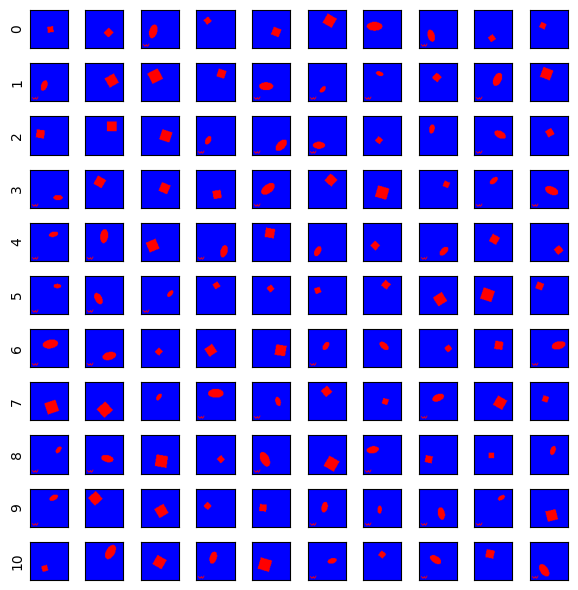

In [156]:
imgs = {}
i = 0
wms = []
for batch in train_loader:
    data, labels = batch
    imgs[f"{i}"] = [imgify(data[x]) for x in range(10)]
    wms += [f'{labels[j]}_{data[j][0,57,12]}' for j in range(10) ]
    i += 1
    if i > 10:
        break
plot_grid(imgs)
print(Counter(wms), wms)

/home/lilli/miniconda3/envs/mt/lib/python3.10/site-packages/crp/image.py:288: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


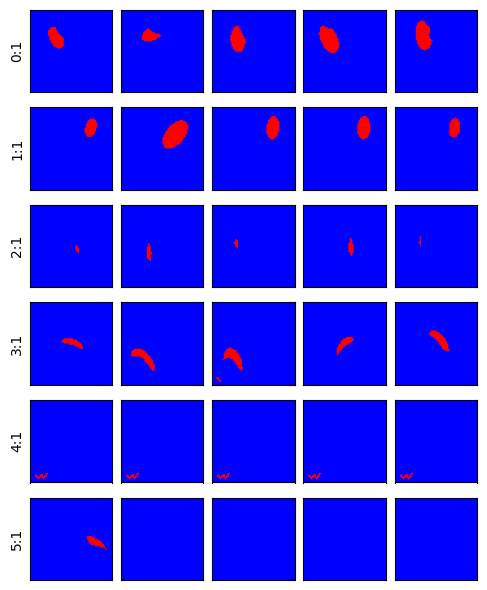

In [29]:
crp_attribution.make_all_relevances("convolutional_layers.6", range(6))

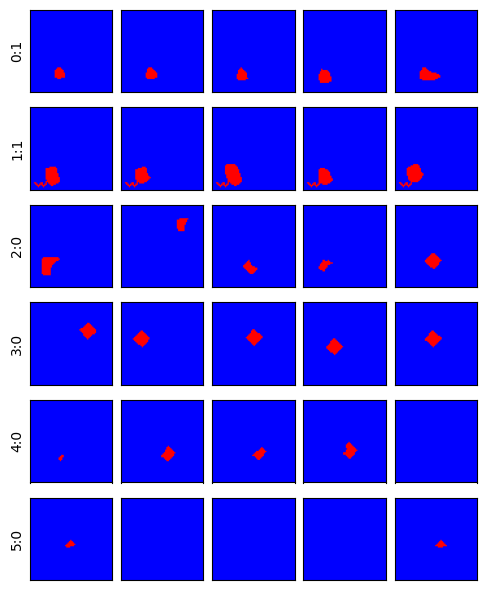

In [30]:
crp_attribution.make_all_relevances("linear_layers.0", range(6))

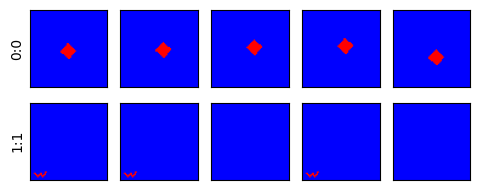

In [31]:
crp_attribution.make_all_relevances("linear_layers.2", range(2))

In [33]:
causd = CausalDiscovery(test_ds, model, crp_attribution)

In [34]:
new_layers = [
    ["factors", ["shape", "scale", "rot", "posX", "posY", "watermark"]],
    #["convolutional_layers.0", range(6)],
    #["convolutional_layers.3", range(6)],
    ["convolutional_layers.6", range(6)],
    ["linear_layers.0", range(6)],
    #["linear_layers.2", range(2)],
    ["prediction",   ["class"]],  #["rectangle", "ellipse"]] #
]  # , ["prediction", range(3)]
causd.change_layers(new_layers)

dataframe, var_names, layers, indices = causd.no_constants_df(with_type=True)

all variables: (19,),
 non-constant variables: (19,),                
 shape of dataset: (2000, 19) 
 new layers: 
[['factors', ['shape', 'scale', 'rot', 'posX', 'posY', 'watermark']], ['convolutional_layers.6', [0, 1, 2, 3, 4, 5]], ['linear_layers.0', [0, 1, 2, 3, 4, 5]], ['prediction', ['class']]]
 var names = ['facts_shape' 'facts_scale' 'facts_rot' 'facts_posX' 'facts_posY'
 'facts_watermark' 'conv6_0' 'conv6_1' 'conv6_2' 'conv6_3' 'conv6_4'
 'conv6_5' 'line0_0' 'line0_1' 'line0_2' 'line0_3' 'line0_4' 'line0_5'
 'predn_class']


In [35]:
results = causd.causal_discovery(
    layers, dataframe, test="CMIknnMixed", link_assum=True
)


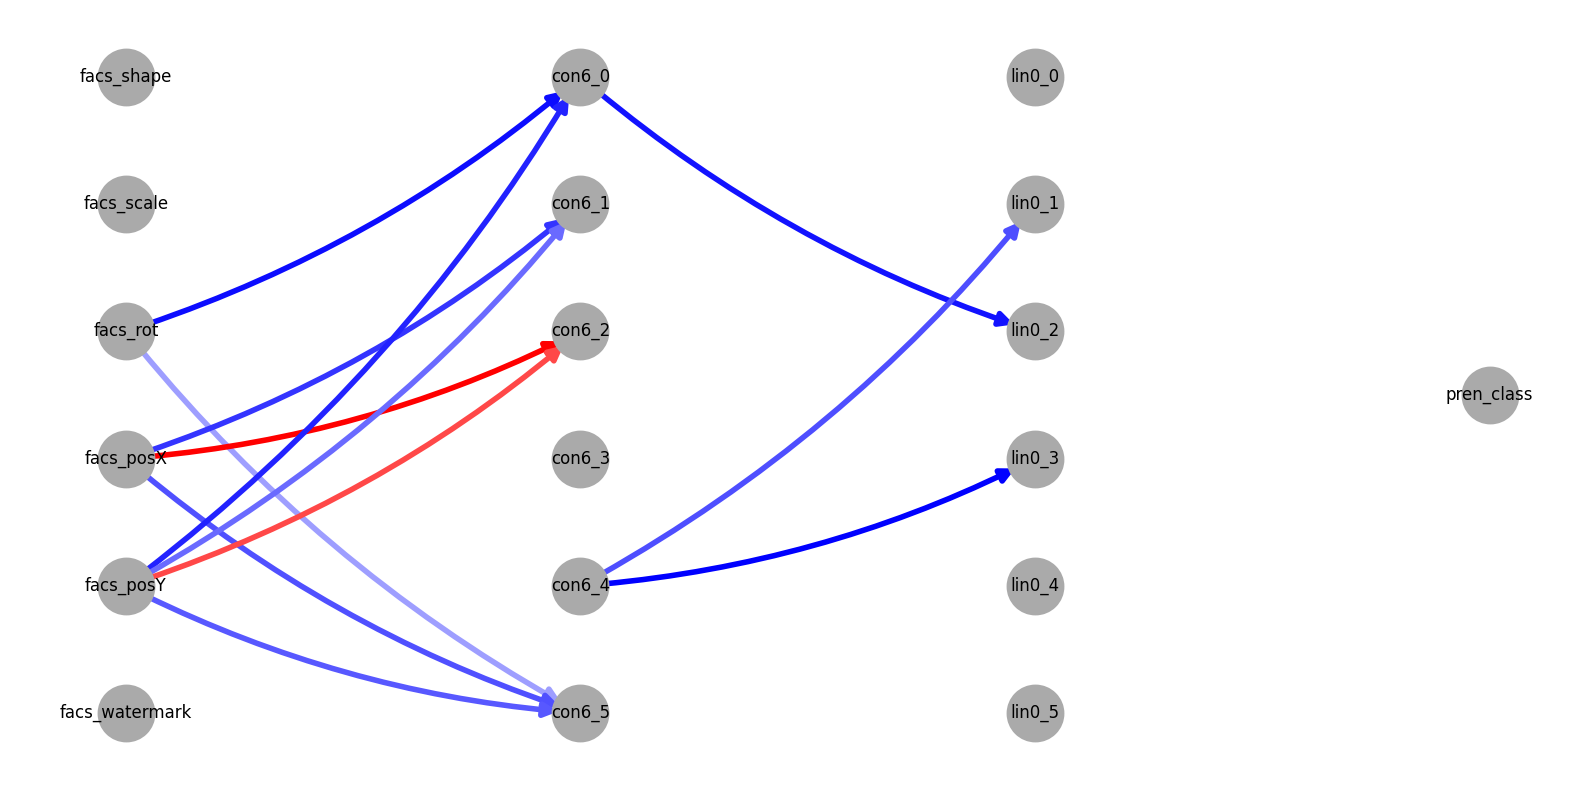

In [36]:
plot_multipartite(results, layers)

In [86]:
indices = sample_from_categories(test_ds)
rele, cluster_data = average_hierarchies(crp_attribution, indices)

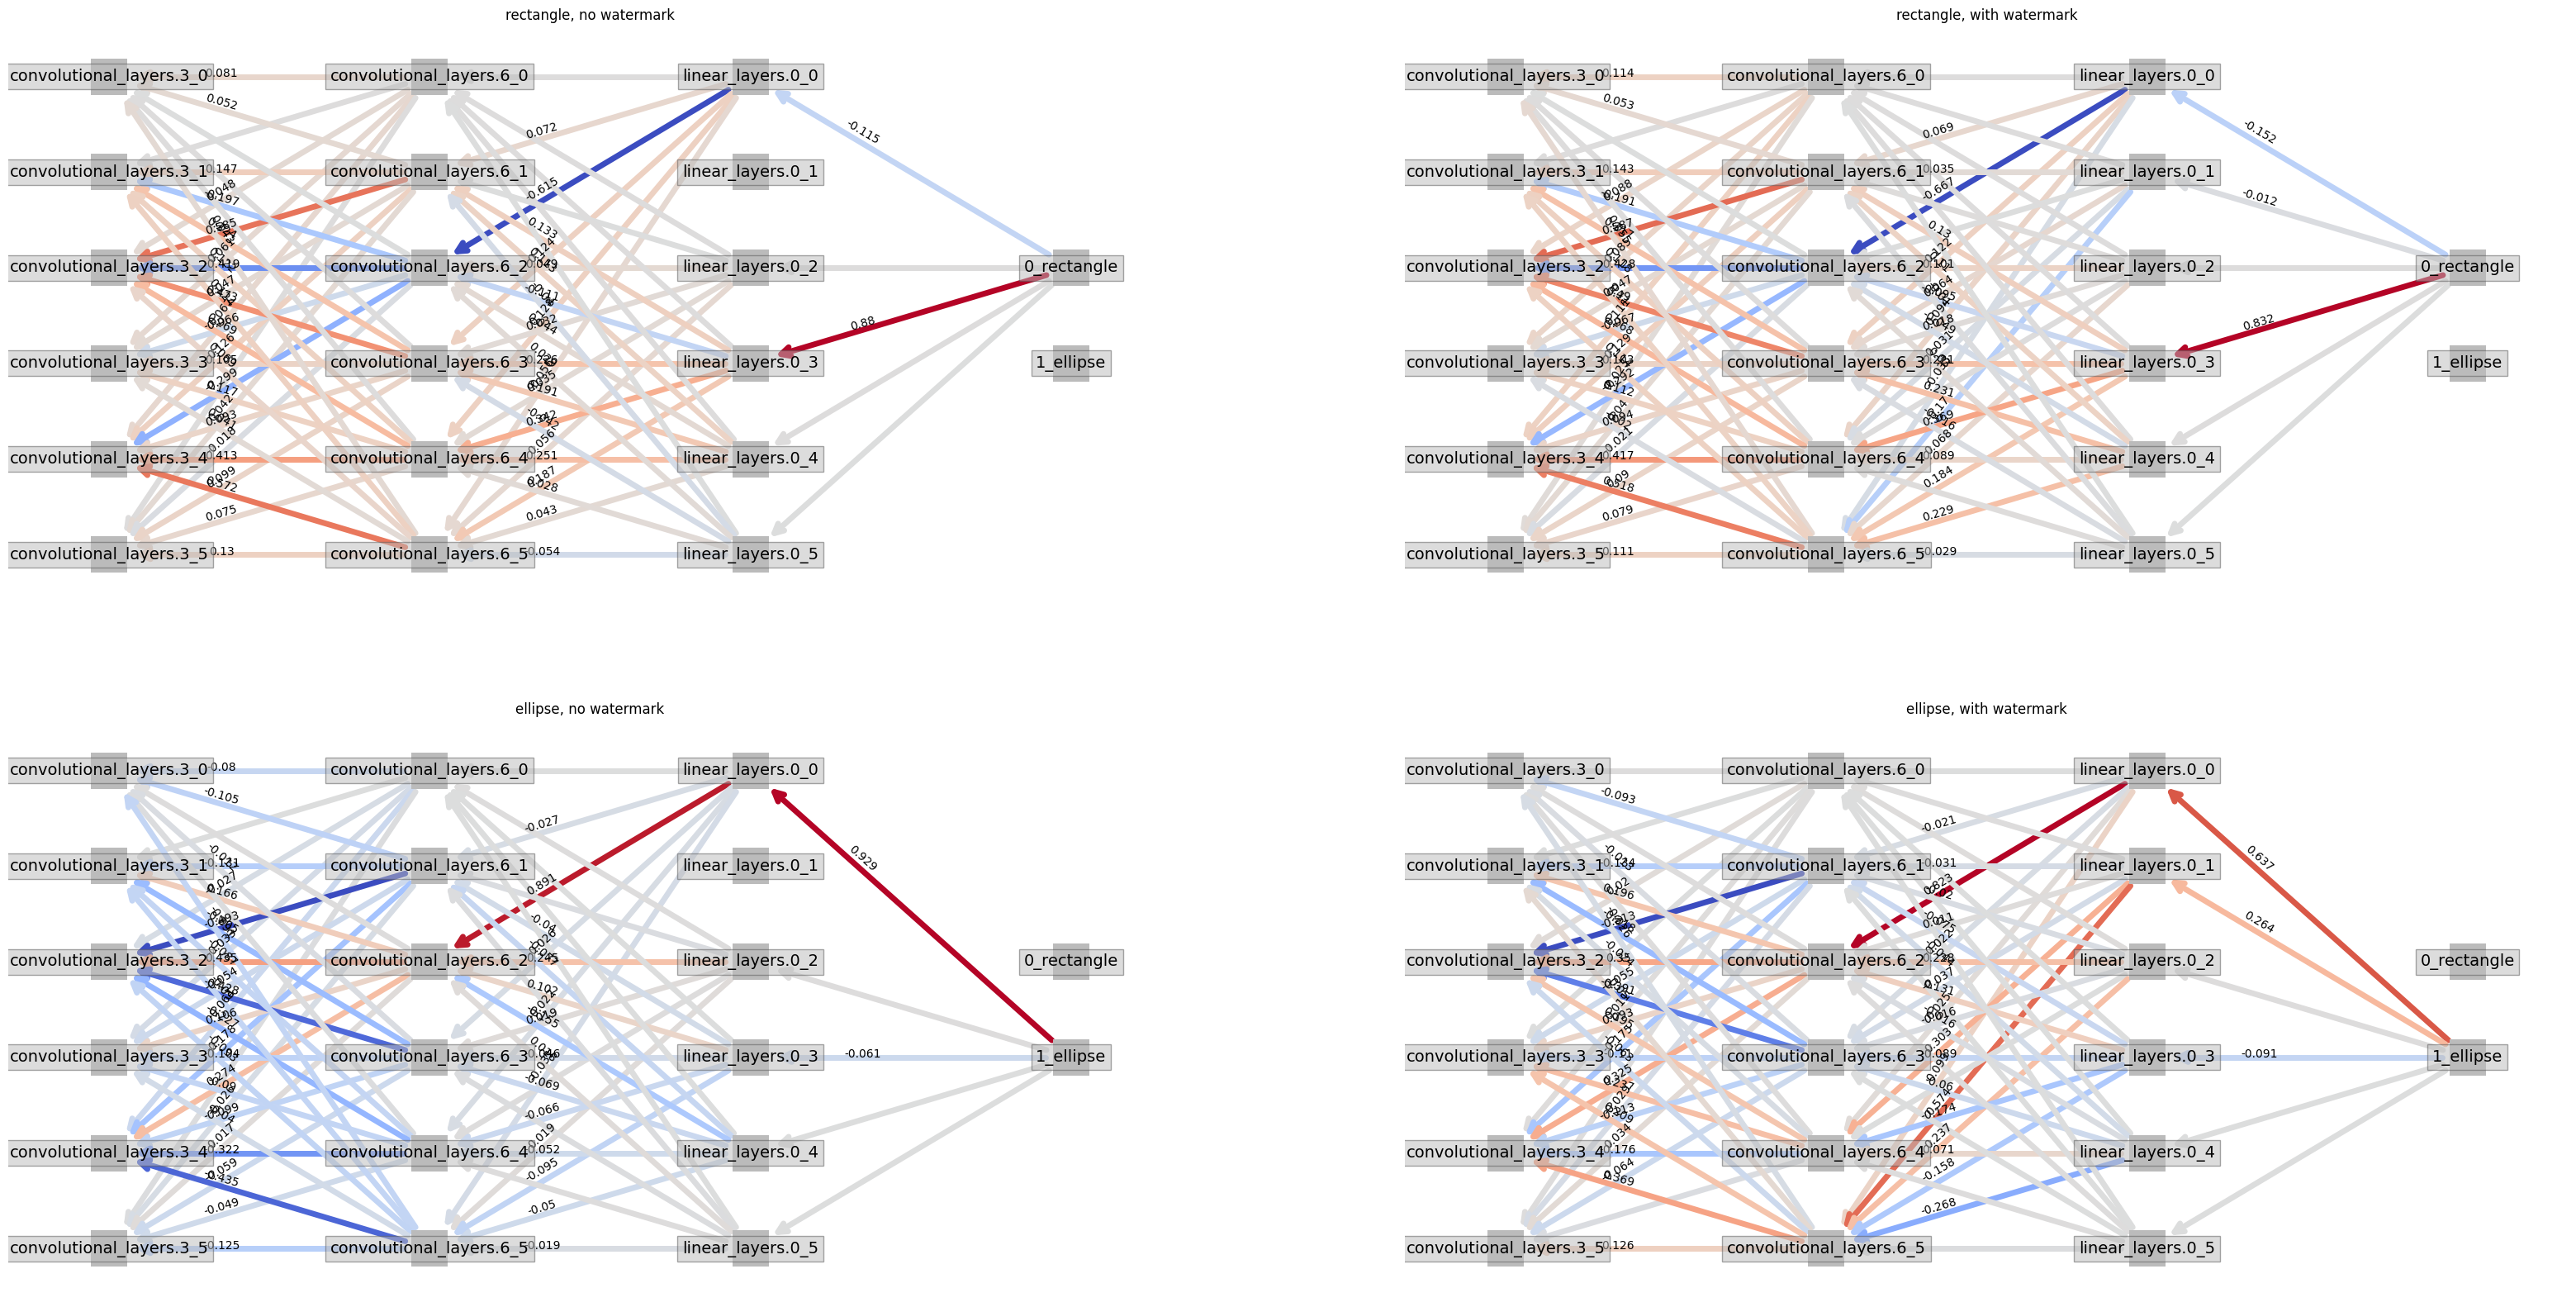

In [87]:
fig = plt.figure(figsize=(40, 20))

ax0 = fig.add_subplot(221, frame_on=False)
ax1 = fig.add_subplot(222, frame_on=False)
ax2 = fig.add_subplot(223, frame_on=False)
ax3 = fig.add_subplot(224, frame_on=False)
draw_graph(list(rele["nodes"]), rele[0][0], ax0)
ax0.title.set_text('rectangle, no watermark')
draw_graph(list(rele["nodes"]), rele[0][1], ax1)
ax1.title.set_text('rectangle, with watermark')
draw_graph(list(rele["nodes"]), rele[1][0], ax2)
ax2.title.set_text('ellipse, no watermark')
draw_graph(list(rele["nodes"]), rele[1][1], ax3)
ax3.title.set_text('ellipse, with watermark')

84


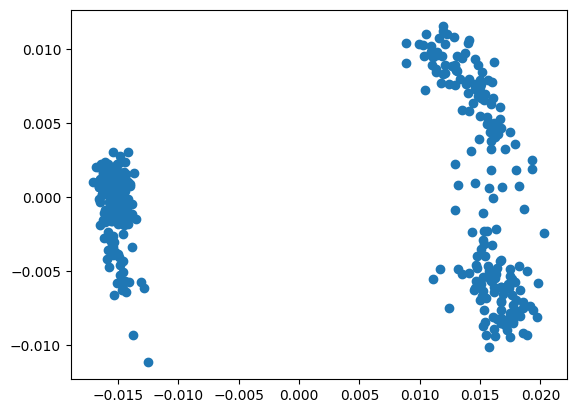

In [111]:
from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import PCA

tsne = TSNE(n_components=2, perplexity=30, learning_rate=0.5)
keys = list(cluster_data.keys())
tsnematrix = np.zeros((400,len(keys)))
print(len(keys))
for i in range(400):
    for j in range(len(keys)):
        if len(cluster_data[keys[j]]) > i:
            tsnematrix[i,j] = cluster_data[keys[j]][i]

#print(tsnematrix.shape)
#res = tsne.fit_transform(tsnematrix)
#isomap = Isomap(n_neighbors=100)
#res = isomap.fit_transform(tsnematrix)
pca = PCA(n_components=2)
res = pca.fit_transform(tsnematrix)
plt.scatter(res[:,0], res[:,1])

In [89]:
# calculate difference between relevances with and without watermark
# some distance measure between concept relevances
# two options:
# 1. use the heatmaps 
# -> Earth Mover distance between watermark itself and heatmap, should be large for images without, small for images with watermark
# -> or: don't need to complicate with earth mover distance, can just take ratio of importance in watermark mask to outside of watermark mask somehow?
# 2. use relevance scores:
# -> take euclidean distance between sets as similarity measure
# ratio of watermark importance: (sim([0,1], [1,1]) + sim([0,0],[1,0]) )/ (sim([0,0], [0,1]) + sim([1,0], [1,1]))
# what do I want to know?
# - which concepts find watermark?
# - how important are those concepts to the prediction?
# - how does the importance of watermark concepts differ depending on the signal-to-noise ratio?
# - is the dependence on the watermark in accordance with the accuracies dependence on the watermark?
# -> 
# how many concepts have the majority of their relevance on the watermark
# sum of relevance inside of mask - sum of relevance outside of mask


1 1
{0: Counter({True: 123163, False: 122597}), 1: Counter({False: 123197, True: 122563})}


100%|██████████| 1152/1152 [00:39<00:00, 29.49it/s]


acc_p_c_nobias: [49.90778411 49.78837701]


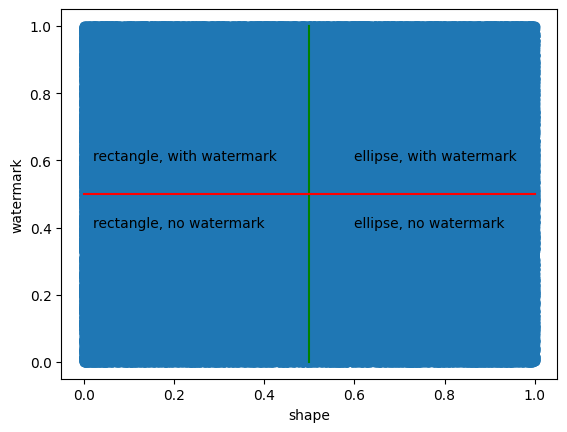

In [61]:
nobias = get_biased_loader(0.0, 0.5)
acc_p_c_nobias = accuracy_per_class(model, nobias)
print(f"acc_p_c_nobias: {acc_p_c_nobias}")

{0: Counter({True: 245760}), 1: Counter({True: 245760})}


100%|██████████| 1152/1152 [01:15<00:00, 15.34it/s]


acc_p_c_allwm: [99.81014375 99.98372131]


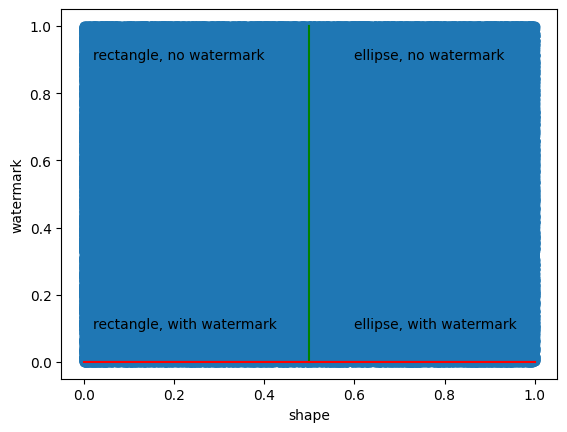

In [90]:
allwm = get_biased_loader(0.0, 0)
acc_p_c_allwm = accuracy_per_class(model, allwm)
print(f"acc_p_c_allwm: {acc_p_c_allwm}")

{0: Counter({False: 245760}), 1: Counter({False: 245760})}


100%|██████████| 1152/1152 [01:06<00:00, 17.34it/s]


acc_p_c_nowm: [99.97558991 99.88604916]


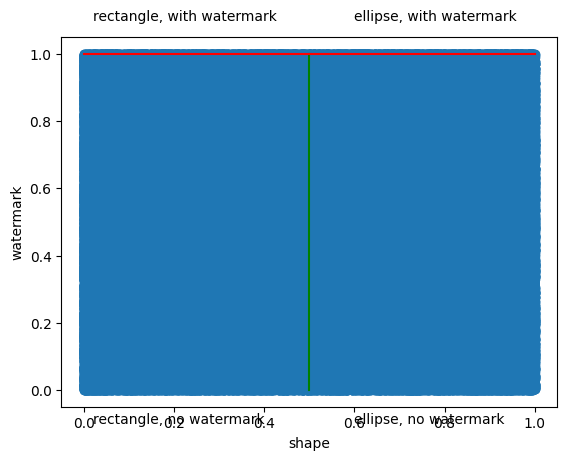

In [91]:
nowm = get_biased_loader(0.0, 1)
acc_p_c_nowm = accuracy_per_class(model, nowm)
print(f"acc_p_c_nowm: {acc_p_c_nowm}")

{0: Counter({False: 245760}), 1: Counter({True: 245760})}


100%|██████████| 1152/1152 [01:11<00:00, 16.08it/s]


acc_p_c_fullbias: [99.86981286 99.92403277]


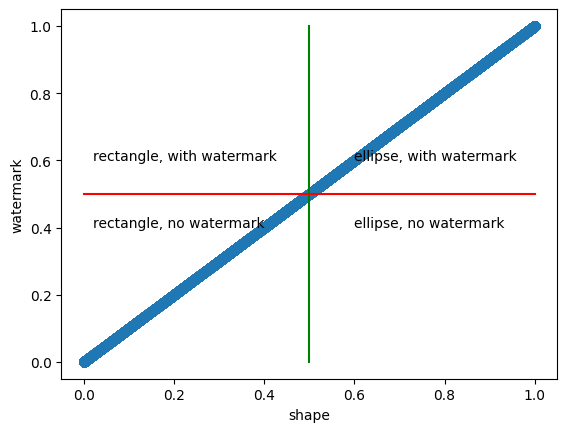

In [72]:
fullbias = get_biased_loader(1, 0.5)
acc_p_c_fullbias = accuracy_per_class(model, fullbias)
print(f"acc_p_c_fullbias: {acc_p_c_fullbias}")

{'rel': 0.0006488044164143503, 'rel_rest': 0.8143771886825562, 'pred': tensor([[-2.9894,  4.4839]]), 'label': 1, 'indi': 394200}
0.773849700794301


Text(-80, -2, 'relevance watermark: 0.001, rest: 0.814, true label: 1, prediction: tensor([-2.9894,  4.4839])')

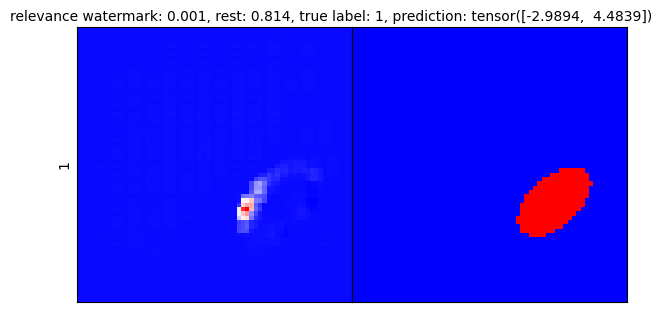

In [110]:
def print_a(*args):
    print(dict(((k, eval(k)) for k in args)))


indi = np.random.randint(0, 400000)
img, _ = test_ds[indi]
rel, rel_rest, heatmap, pred, label = crp_attribution.watermark_importance(indi)
print_a("rel", "rel_rest", "pred", "label", "indi")

print((204 * rel + (4096 - 204) * rel_rest) / 4096)
plot_grid({label: [heatmap, img[0]]})
plt.text(-80, -2, f"relevance watermark: {round(rel,3)}, rest: {round(rel_rest,3)}, true label: {label}, prediction: {pred[0]}")

output: tensor([[ 8.6841, -6.9458]]), 
 latents: [ 0  4  1 28 15], 
 watermark: True, 
 prediction:0  
 
 convolutional_layers.0: 
 3: 34.55%, 5: 25.66%, 0: 14.99%, 4: 12.94%, 2: 11.85%, 1: -0.0% 
 
 convolutional_layers.3: 
 4: 34.77%, 2: 33.89%, 5: 11.82%, 1: 10.78%, 3: 6.45%, 0: 2.29% 
 
 convolutional_layers.6: 
 4: 32.29%, 3: 18.76%, 5: 15.32%, 1: 11.95%, 0: 0.4%, 2: -21.27% 
 
 linear_layers.0: 
 3: 82.51%, 2: 0.27%, 4: 0.1%, 5: 0.0%, 1: 0.0%, 0: -17.11% 
 
 linear_layers.2: 
 0: 100.0%, 1: 0.0% 


/home/lilli/miniconda3/envs/mt/lib/python3.10/site-packages/zennit/image.py:187: RuntimeWarning: invalid value encountered in divide
  array = (array - vmin) / (vmax - vmin)


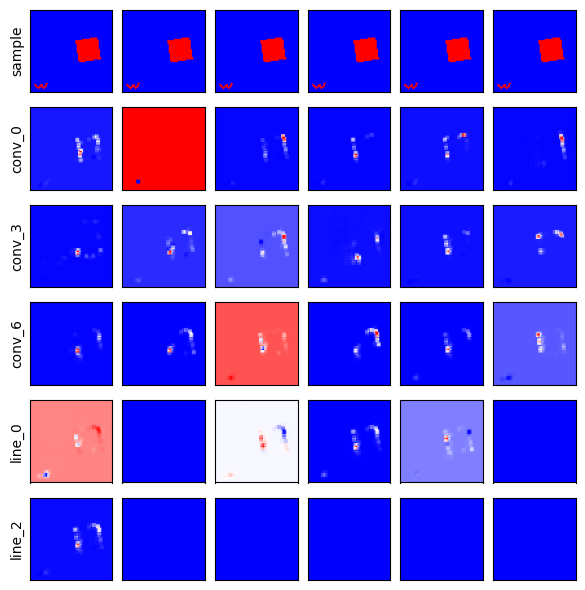

In [93]:
crp_attribution.image_info(indi)

In [94]:
#indices = sample_from_categories(test_ds)
SSIZE = 100
relevances_wm = {
    0: {0: 0.0, 1: 0.0},
    1: {0: 0.0, 1: 0.0},
}
relevances_rest = {
    0: {0: 0.0, 1: 0.0},
    1: {0: 0.0, 1: 0.0},
}
confidence = {
    0: {0: 0.0, 1: 0.0},
    1: {0: 0.0, 1: 0.0},
}
wmimp = 0
for s in range(2):
    for w in range(2):
        for ind in indices[s][w]:
            rel, rel_rest, heatmap, pred, label = crp_attribution.watermark_importance(
                ind
            )
            relevances_wm[s][w] += rel * 1 / 100
            relevances_rest[s][w] += rel_rest * 1 / 100
            confidence[s][w] += (204*rel - (4096-204)* rel_rest) / 409600 #float(pred[0,label]) * 1 / 100
            if w == 1:
                wmimp += (rel - rel_rest)
            else:
                wmimp += (rel_rest - rel)


In [95]:
relevances_wm, relevances_rest, confidence, wmimp

({0: {0: 0.015558162746601734, 1: -0.5514909190684556},
  1: {0: 0.0021678108574724325, 1: 3.4370833861827856}},
 {0: {0: 15.371100401878362, 1: 15.202211093902594},
  1: {0: 0.028546328693628338, 1: -1.0615043553803114}},
 {0: {0: -14.60477268039801, 1: -14.472536553945028},
  1: {0: -0.027016620571454347, 1: 1.179819326640982}},
 412.6806485559964)

In [ ]:
# find a good measure for "watermark importance" -> something similar to accuracy
# how much of the prediction relies on existence / non existence of watermark, how much is rest? 

In [110]:
""" setup_args = {"figsize": (30,30),"label_space_left": 0.05,"label_space_top": 0.03}
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':None}, 
                    setup_args=setup_args); plt.show() """

' setup_args = {"figsize": (30,30),"label_space_left": 0.05,"label_space_top": 0.03}\ntp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={\'matrix_lags\':None}, \n                    setup_args=setup_args); plt.show() '